# I/O with files 

Today we cover some practical aspects of python that make it a great language for scripting. While the same is possibile with bash and other shells, the OOP aspect of python and its high level semantics make it very easy for a beginner to write their first scripts.

- Input/Output with files
  - with statement
  - parsing lines
  - lines as lists
  - splitting lines into lists
  
- Fitting data with scipy
  
- json format for storage
  - example of json usage
  - storing python objects and reading them back
  - storing custom python objects
   [custom serialize](https://realpython.com/python-json/)
  
- functions with variable number of arguments
  - example of printf


# File handling

Basic I/O with files is almost identical to C, at first.

- You need to open a file object on disk before writing information into it
- Opening a file can fail
  - location does not exist
  - no write privilege for the location

By default a file is opened in **read** mode

In [1]:
fname = '/tmp/data.txt'
f = open(fname)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/data.txt'

You must specify the **write** mode to store data in a file in output

In [2]:
fname = '/tmp/data.txt'

f = open(fname,mode='w')

In [3]:
print(f)

<_io.TextIOWrapper name='/tmp/data.txt' mode='w' encoding='UTF-8'>


In this case the user does not have write permissions in `/`.

Possible modes are:
```
========= ===============================================================
Character Meaning
--------- ---------------------------------------------------------------
'r'       open for reading (default)
'w'       open for writing, truncating the file first
'x'       create a new file and open it for writing
'a'       open for writing, appending to the end of the file if it exists
'b'       binary mode
't'       text mode (default)
'+'       open a disk file for updating (reading and writing)
========= ===============================================================
```
So by default a text file is opened in read mode.

We now store some values in a file to simulate data.

It is important to close the file to make sure all data are flushed from memory to disk and the file handle closed properly

In [4]:
import os

l0 =  set(os.listdir())

print(len(l0))


43


In [5]:
print(type(l0))

<class 'set'>


In [6]:
print("print one file at the time")
for i in l0:
    print(i)

print one file at the time
python-01.ipynb
python-03.ipynb
2020-10-02-board.pdf
2020-10-30-board.pdf
introduction.pdf
boost.md
2020-11-03-board.pdf
2020-10-13-board.pdf
cpp.pdf
2020-10-27-board.pdf
strategy_pattern.gif
2020-10-20-board.pdf
python.md
2020-10-09-board.pdf
Composite_UML_class_diagram.png
2020-11-20-board.pdf
.DS_Store
ml.md
2020-11-10-board.pdf
ROOT.md
2020-11-13-board.pdf
dxfit.jpg
dx.jpg
python-05.ipynb
2020-11-27-board.pdf
2020-11-24-board.pdf
makefile.md
2020-09-29-board.pdf
python-04.ipynb
python-02.ipynb
special-attributes.png
composite.md
hw-01.pdf
classification-example.ipynb
pynb-save.png
.ipynb_checkpoints
strategy.md
x.jpg
pynb-raw.png
2020-10-06-board.pdf
2020-10-16-board.pdf
img
2020-10-23-board.pdf


Note how `listdir()` shows files and directories and gidden files starting with `.`

In [10]:
fname = 'data.txt'
f = open(fname,'w')

f.write('first file in python\n')
f.write('a second line\n')
    
f.close()


By default `write()` does  not have a carriage return so you need to add `\n` to start a new line

check the new files

In [11]:
lnew = set(os.listdir())

new_items = lnew.difference(l0)
print(new_items)

{'data.txt'}


use the magic jupyter command to look at the file

In [12]:
!cat data.txt

first file in python
a second line


## getting rid of `close()`

To make it less C-like and feel more like python we can get rid of `close()` is usinng the `with` statement

In [13]:
fname = 'data2.txt'

with open(fname,'w') as ofile:
  ofile.write('a new file in python\n')
  ofile.write('1.2 3.2   4.5\n')


`with` makes sure that ofile is an open file handle in the `with` scope. Once it ends you can no more use the handle, because `close()` has been called autmatically

In [14]:
!cat data2.txt

a new file in python
1.2 3.2   4.5


## Storing lists and multiple values

You can use the C-style output to format and store elements of a list

In [15]:
import random

nevents = 3

fname = 'data1.txt'

with open(fname,'w') as f:
    for i in range(nevents):
        measurements = [ random.random() for j in range(5) ]
        for val in measurements:
            f.write("%.5f\t"%val)
        f.write('\n')


In [16]:
!cat data1.txt

0.76337	0.75836	0.40287	0.25521	0.20550	
0.05801	0.17767	0.67800	0.92456	0.68737	
0.43163	0.83261	0.38191	0.23840	0.52713	


A more python-style is to use a new `writelines()` function and comprehensions

In [17]:
import random

nevents = 3

fname = 'data2.txt'
with open(fname,'w') as f:
    for i in range(nevents):
        measurements = [ random.random() for j in range(5) ]
        f.writelines("%.3f\t"%val for val in measurements)
        f.write('\n')

In [18]:
!cat data2.txt

0.395	0.157	0.681	0.082	0.144	
0.868	0.703	0.545	0.645	0.304	
0.944	0.000	0.989	0.850	0.451	


which can be further reduced

In [19]:
import random

nevents = 10

fname = 'data2.txt'
with open(fname,'w') as f:
    for i in range(nevents):
        f.writelines("%.3f\t"%val for val in [ random.random() for j in range(3) ] )
        f.write('\n')


## Input from file

A file can be read in a single string and then split into lines and columns. 

In [20]:
fname = 'data2.txt'

f = open(fname)
file = f.read()
print(file)

0.300	0.217	0.492	
0.431	0.235	0.134	
0.113	0.672	0.890	
0.904	0.352	0.341	
0.891	0.472	0.602	
0.070	0.110	0.189	
0.683	0.173	0.906	
0.650	0.529	0.901	
0.010	0.850	0.339	
0.611	0.787	0.841	



In [21]:
print(type(file))

<class 'str'>


In [22]:
vals = file.split()
print(type(vals))
print(len(vals))


<class 'list'>
30


In [23]:
print(vals[0])
print(vals[-1])

0.300
0.841


In [24]:
print(vals)

['0.300', '0.217', '0.492', '0.431', '0.235', '0.134', '0.113', '0.672', '0.890', '0.904', '0.352', '0.341', '0.891', '0.472', '0.602', '0.070', '0.110', '0.189', '0.683', '0.173', '0.906', '0.650', '0.529', '0.901', '0.010', '0.850', '0.339', '0.611', '0.787', '0.841']


In [26]:
import numpy as np

np_vals = np.array(vals)
print(np_vals)

['0.300' '0.217' '0.492' '0.431' '0.235' '0.134' '0.113' '0.672' '0.890'
 '0.904' '0.352' '0.341' '0.891' '0.472' '0.602' '0.070' '0.110' '0.189'
 '0.683' '0.173' '0.906' '0.650' '0.529' '0.901' '0.010' '0.850' '0.339'
 '0.611' '0.787' '0.841']


In [32]:
np_new = np_vals.reshape(10,3)

In [34]:
print(np_new[0])

['0.300' '0.217' '0.492']


### Reading line by line
You could also read the file as a list of lines, each line marked by a newline `\n`

In [35]:
fname = 'data2.txt'
lines = [l for l in open(fname)]
print(type(lines))
print(len(lines))

<class 'list'>
10


In [36]:
print(lines[-1])

0.611	0.787	0.841	



However you note that you have `\t` and `\n` as part of the string being read in. Fixing this is easy with the `strip()` function

In [38]:
fname = 'data2.txt'
lines = [l.strip() for l in open(fname)]
print(lines)

['0.300\t0.217\t0.492', '0.431\t0.235\t0.134', '0.113\t0.672\t0.890', '0.904\t0.352\t0.341', '0.891\t0.472\t0.602', '0.070\t0.110\t0.189', '0.683\t0.173\t0.906', '0.650\t0.529\t0.901', '0.010\t0.850\t0.339', '0.611\t0.787\t0.841']


this has removed the `\n`. We now split each line using `\t` as the separator

In [39]:
fname = 'data2.txt'

lines = [l.strip() for l in open(fname)]

data = [ l.split('\t') for l in lines ]


In [41]:
print(data)

[['0.300', '0.217', '0.492'], ['0.431', '0.235', '0.134'], ['0.113', '0.672', '0.890'], ['0.904', '0.352', '0.341'], ['0.891', '0.472', '0.602'], ['0.070', '0.110', '0.189'], ['0.683', '0.173', '0.906'], ['0.650', '0.529', '0.901'], ['0.010', '0.850', '0.339'], ['0.611', '0.787', '0.841']]


In [43]:
print(data[0:1])


[['0.300', '0.217', '0.492']]


even more concisely

In [44]:
fname = 'data2.txt'
data = [ l.split('\t') for l in [line.strip() for line in open(fname)] ]
print(data)

[['0.300', '0.217', '0.492'], ['0.431', '0.235', '0.134'], ['0.113', '0.672', '0.890'], ['0.904', '0.352', '0.341'], ['0.891', '0.472', '0.602'], ['0.070', '0.110', '0.189'], ['0.683', '0.173', '0.906'], ['0.650', '0.529', '0.901'], ['0.010', '0.850', '0.339'], ['0.611', '0.787', '0.841']]


### exercise
- change the separator and use `,` or `:` to store and read back data files

### Reading data into arrays

Often you will have a file with the following structure
```
#x  #y  #z  #t  #energy
.. ..  ..   ..  ....
.. ..  ..   ..  ....
.. ..  ..   ..  ....
.. ..  ..   ..  ....
```

with data stored per event (line) in columns (variables).

With numpy we can read the data directly into arrays per column without reading in all data and then manipulate it
- [Input/Output with numpy](https://numpy.org/doc/stable/reference/routines.io.html)

In particular [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html#numpy.loadtxt) is very handy for quick reading of data from files


In [45]:
!cat data2.txt

0.300	0.217	0.492	
0.431	0.235	0.134	
0.113	0.672	0.890	
0.904	0.352	0.341	
0.891	0.472	0.602	
0.070	0.110	0.189	
0.683	0.173	0.906	
0.650	0.529	0.901	
0.010	0.850	0.339	
0.611	0.787	0.841	


In [46]:
fname = 'data2.txt'

data = np.loadtxt(fname)

print(data.shape)

(10, 3)


In [47]:
print(data)

[[0.3   0.217 0.492]
 [0.431 0.235 0.134]
 [0.113 0.672 0.89 ]
 [0.904 0.352 0.341]
 [0.891 0.472 0.602]
 [0.07  0.11  0.189]
 [0.683 0.173 0.906]
 [0.65  0.529 0.901]
 [0.01  0.85  0.339]
 [0.611 0.787 0.841]]


In [48]:
print(data[0])

[0.3   0.217 0.492]


In [49]:
print(data[:,0])

[0.3   0.431 0.113 0.904 0.891 0.07  0.683 0.65  0.01  0.611]


now use slicing to put in columns

In [50]:
x = data[:,0]
y = data[:,1]
z = data[:,2]

print(z)

[0.492 0.134 0.89  0.341 0.602 0.189 0.906 0.901 0.339 0.841]


since this is a typical usecase, `loadtxt` has options to do it for you

In [51]:
x,z = np.loadtxt(fname, unpack=True, usecols=(0,2))

print(z)

[0.492 0.134 0.89  0.341 0.602 0.189 0.906 0.901 0.339 0.841]


- `usecols=(a,b,c)` or `usecols=d` reads only the specific columns
- `unpack=True` transposes data to go in columns

In [52]:
y = np.loadtxt(fname, unpack=True, usecols=1)
print(y)

[0.217 0.235 0.672 0.352 0.472 0.11  0.173 0.529 0.85  0.787]


<IPython.core.display.Javascript object>


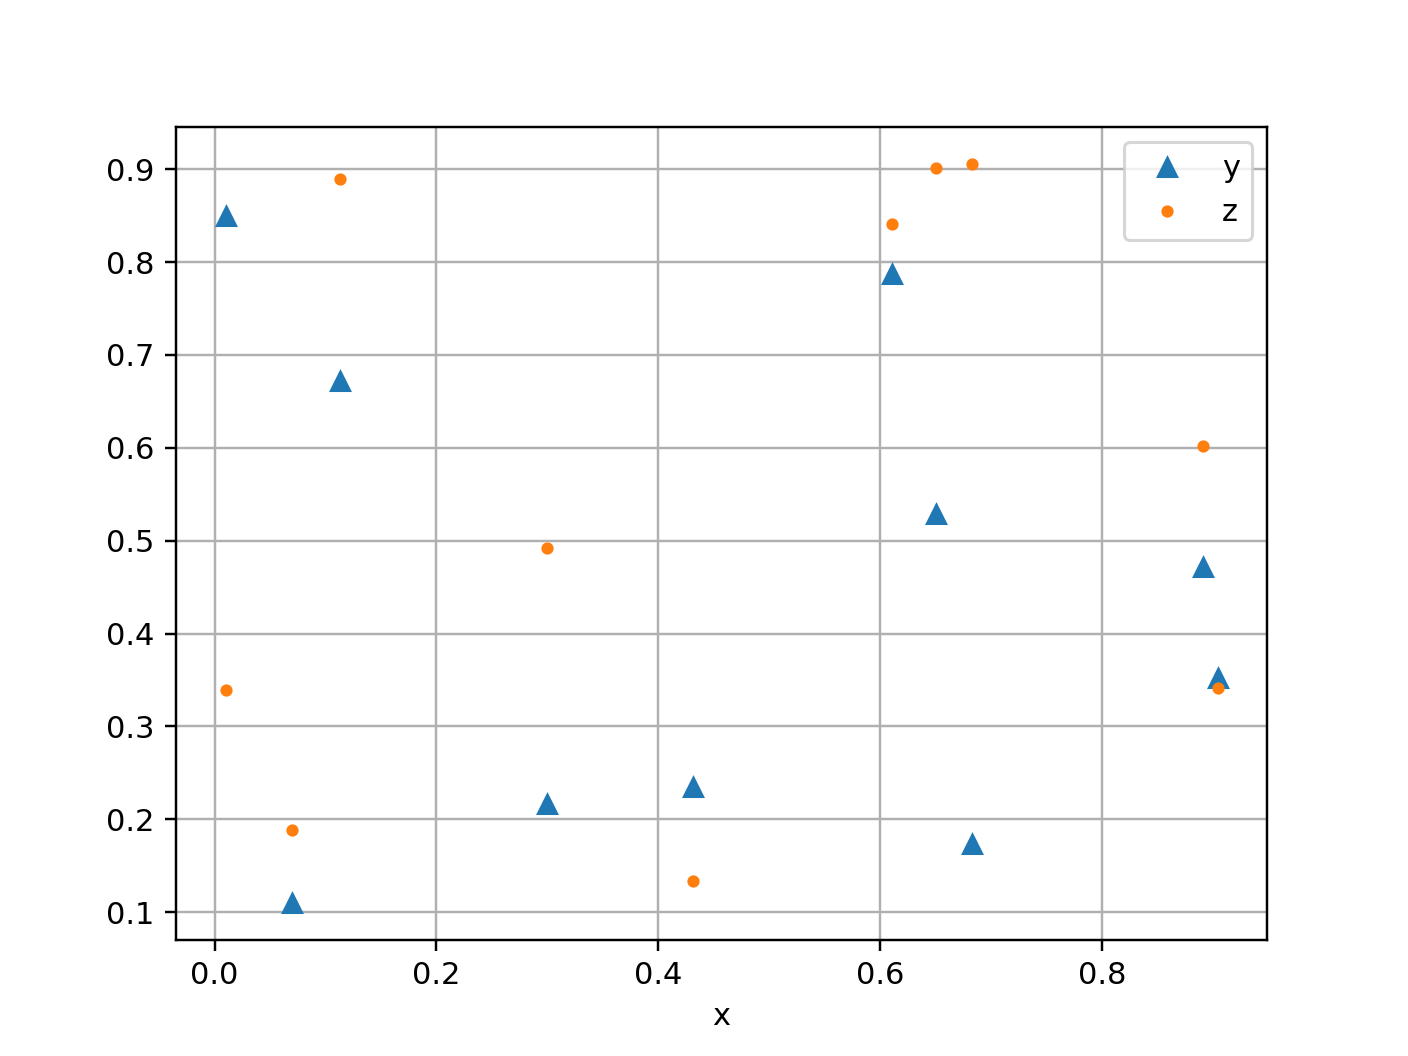

In [53]:
%matplotlib notebook
import matplotlib.pyplot as pl

pl.plot(x,y, '^', label="y")
pl.plot(x,z, '.', label="z")
pl.xlabel('x')
pl.grid()
pl.legend()
pl.show()



# Fitting data

A typical use case for data input is to fit the data to some model and estimate the model parameter.
This can be done easily with the [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function

In this example we

- generate some data according to a model
- add some random noise 
- write the data to file
- read back the data with numpy
- fit the data with `curve_fit`

### generate data

In [56]:
nevents = 100

x = np.linspace(10, 100, nevents)

def background(t, A=100, tau=10):
    return A * np.exp(-t/tau)

y = background(x)

print(type(y))
print(x.shape)
print(y.shape)


<class 'numpy.ndarray'>
(100,)
(100,)


<IPython.core.display.Javascript object>


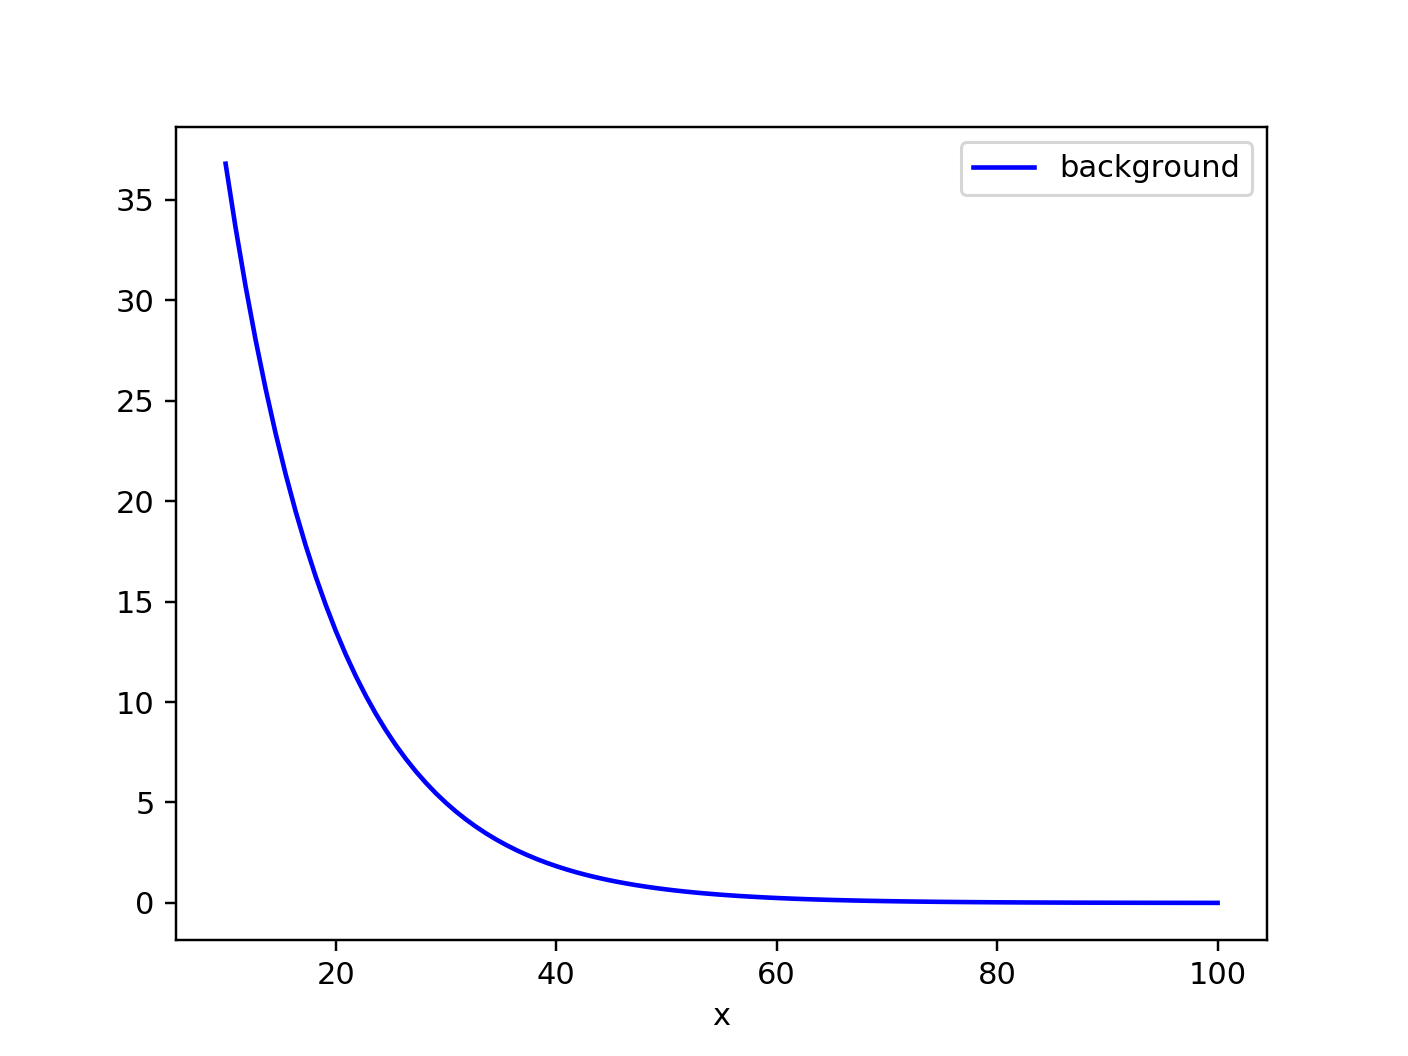

In [57]:
import matplotlib.pyplot as pl

%matplotlib notebook
pl.plot(x,y, 'b-', label='background')
pl.xlabel('x')
pl.legend()

### add some random noise

In [58]:
pedestal = 3

noise = pedestal * np.random.normal(size=x.size)

y_noise = y + noise

<IPython.core.display.Javascript object>


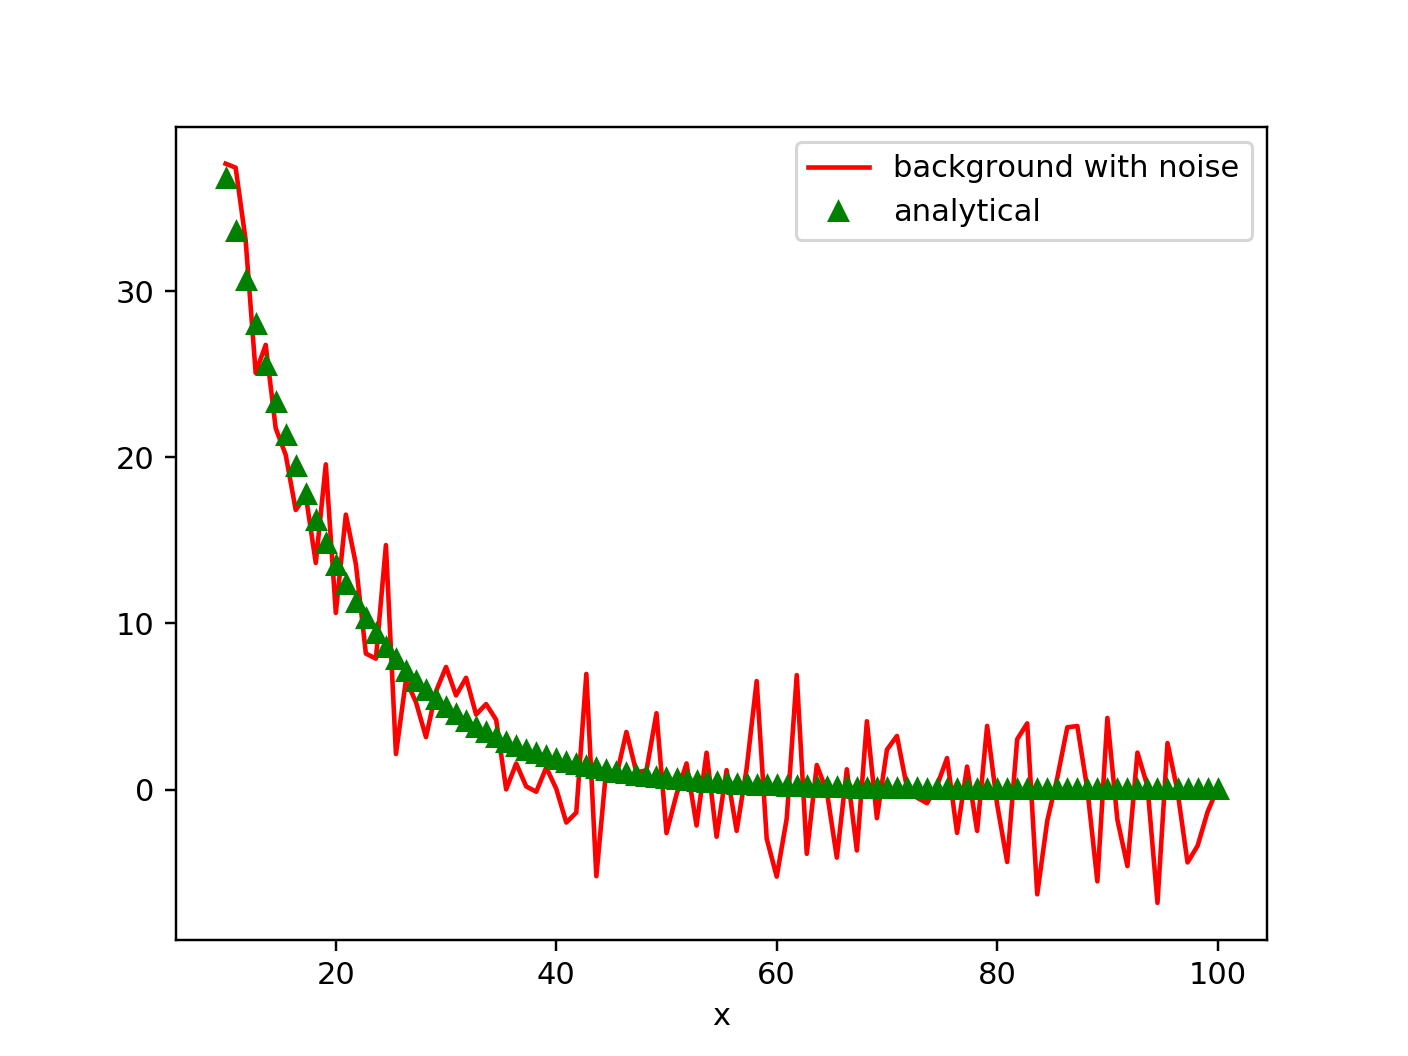

In [60]:
%matplotlib notebook
pl.plot(x,y_noise, 'r-', label='background with noise')
pl.plot(x,y, 'g^', label='analytical')
pl.xlabel('x')
pl.legend()

### write data to file

this time we use [nump.savetxt](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html)

In [65]:
fname = 'fitdata.txt'

np.savetxt(fname, (x, y, y_noise), delimiter=" ", fmt="%.4f")

In [66]:
!cat fitdata.txt

10.0000 10.9091 11.8182 12.7273 13.6364 14.5455 15.4545 16.3636 17.2727 18.1818 19.0909 20.0000 20.9091 21.8182 22.7273 23.6364 24.5455 25.4545 26.3636 27.2727 28.1818 29.0909 30.0000 30.9091 31.8182 32.7273 33.6364 34.5455 35.4545 36.3636 37.2727 38.1818 39.0909 40.0000 40.9091 41.8182 42.7273 43.6364 44.5455 45.4545 46.3636 47.2727 48.1818 49.0909 50.0000 50.9091 51.8182 52.7273 53.6364 54.5455 55.4545 56.3636 57.2727 58.1818 59.0909 60.0000 60.9091 61.8182 62.7273 63.6364 64.5455 65.4545 66.3636 67.2727 68.1818 69.0909 70.0000 70.9091 71.8182 72.7273 73.6364 74.5455 75.4545 76.3636 77.2727 78.1818 79.0909 80.0000 80.9091 81.8182 82.7273 83.6364 84.5455 85.4545 86.3636 87.2727 88.1818 89.0909 90.0000 90.9091 91.8182 92.7273 93.6364 94.5455 95.4545 96.3636 97.2727 98.1818 99.0909 100.0000
36.7879 33.5911 30.6721 28.0067 25.5729 23.3506 21.3215 19.4687 17.7769 16.2321 14.8215 13.5335 12.3575 11.2836 10.3031 9.4078 8.5902 7.8437 7.1621 6.5397 5.9714 5.4525 4.9787 4.5461 4.1510 3.7903 3.

otherwise you can loop and write to file as in the past

In [69]:
fname = 'fitdata2.txt'

with open(fname,'w') as f:
    for i in range(len(x)):
        f.writelines("%.5f %.5f %.5f"%(x[i],y[i],y_noise[i]) )
        f.write('\n')


In [70]:
!cat fitdata2.txt

10.00000 36.78794 37.67251
10.90909 33.59110 37.43611
11.81818 30.67206 33.06781
12.72727 28.00668 25.07933
13.63636 25.57292 26.76456
14.54545 23.35065 21.74986
15.45455 21.32149 20.14178
16.36364 19.46867 16.82594
17.27273 17.77686 17.69763
18.18182 16.23206 13.64231
19.09091 14.82151 19.57360
20.00000 13.53353 10.63022
20.90909 12.35747 16.54970
21.81818 11.28362 13.57634
22.72727 10.30308 8.18623
23.63636 9.40775 7.88104
24.54545 8.59022 14.71456
25.45455 7.84374 2.13952
26.36364 7.16212 6.60718
27.27273 6.53974 5.25614
28.18182 5.97144 3.15535
29.09091 5.45253 5.91559
30.00000 4.97871 7.38277
30.90909 4.54606 5.66744
31.81818 4.15101 6.72738
32.72727 3.79029 4.51696
33.63636 3.46092 5.14839
34.54545 3.16017 4.20383
35.45455 2.88555 0.01190
36.36364 2.63480 1.56964
37.27273 2.40584 0.18910
38.18182 2.19677 -0.13127
39.09091 2.00587 1.33063
40.00000 1.83156 0.04702
40.90909 1.67240 -1.98294
41.81818 1.52707 -1.38383
42.72727 1.39437 6.96015
43.63636 1.27320 -5.21318
44.54545 1.16256

### read data from file

In [71]:
t, z, w = np.loadtxt(fname, unpack=True)
print(t.shape)

(100,)


<IPython.core.display.Javascript object>


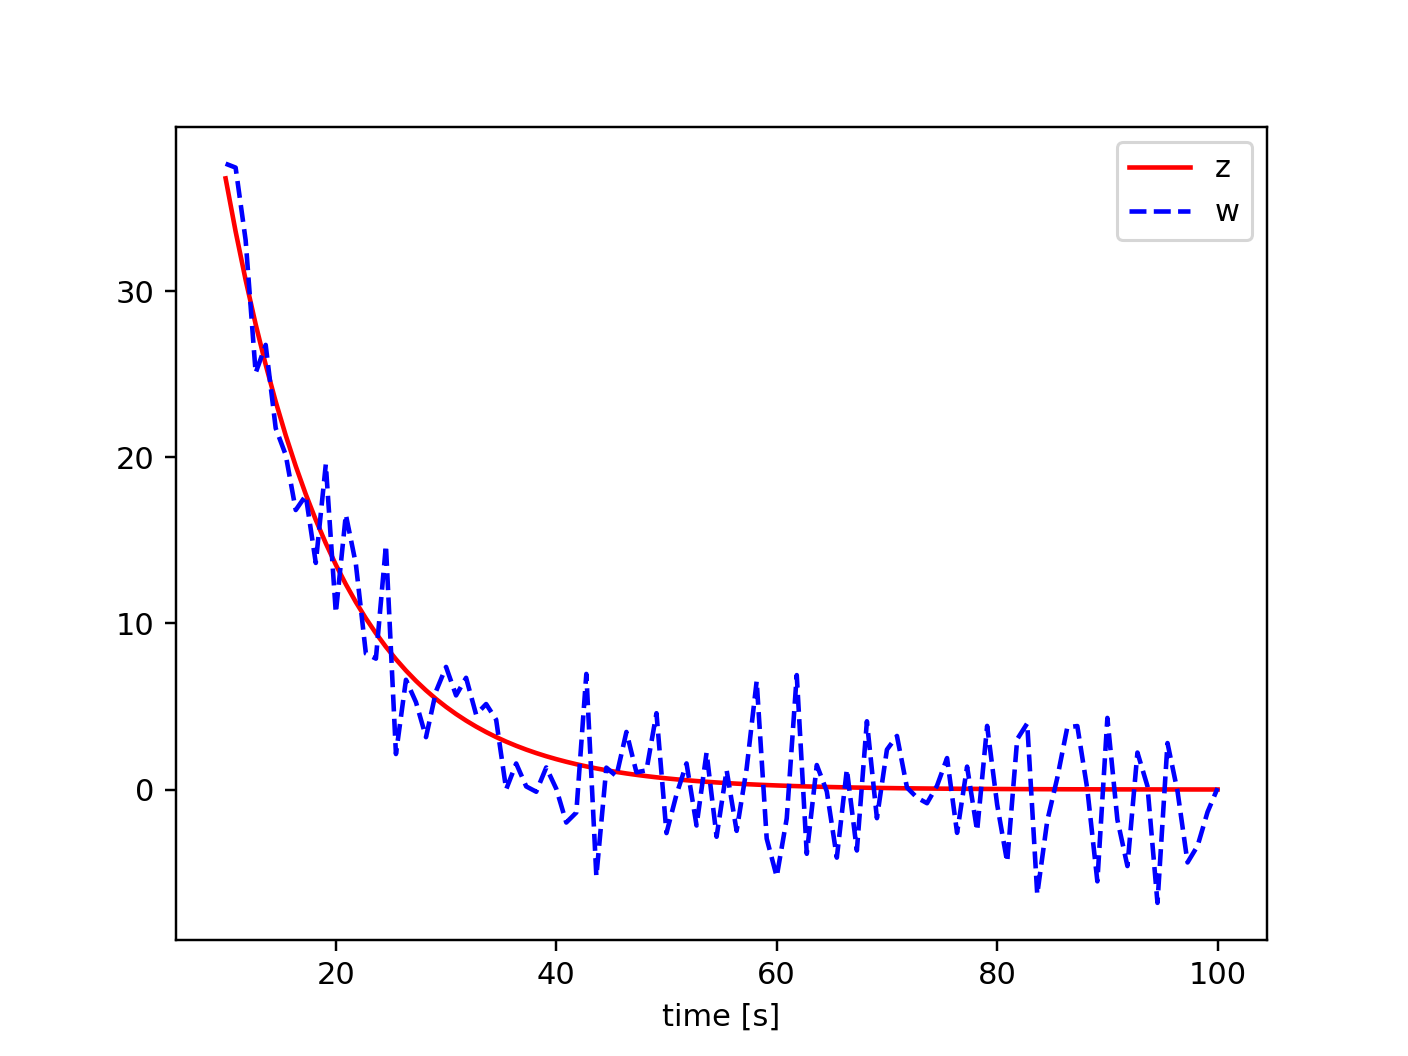

In [72]:
%matplotlib notebook
pl.plot(t,z, 'r-', label='z')
pl.plot(t,w, 'b--', label='w')

pl.xlabel('time [s]')
pl.legend()

### Fit data

In [73]:
def fitfunc(x, N, alpha, c):
    return N*np.exp(-alpha*x) + c


In [75]:
from scipy.optimize import curve_fit

fit_pars, fit_pars_cov = curve_fit(fitfunc, t, w)




[ 1.06033821e+02  1.02040131e-01 -3.68232795e-01]
[[1.36122437e+02 8.67081756e-02 1.69757200e+00]
 [8.67081756e-02 6.23464014e-05 1.67500211e-03]
 [1.69757200e+00 1.67500211e-03 1.64180947e-01]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


In [76]:
print(fit_pars)

[ 1.06033821e+02  1.02040131e-01 -3.68232795e-01]


In [77]:
print(fit_pars_cov)

[[1.36122437e+02 8.67081756e-02 1.69757200e+00]
 [8.67081756e-02 6.23464014e-05 1.67500211e-03]
 [1.69757200e+00 1.67500211e-03 1.64180947e-01]]


<IPython.core.display.Javascript object>


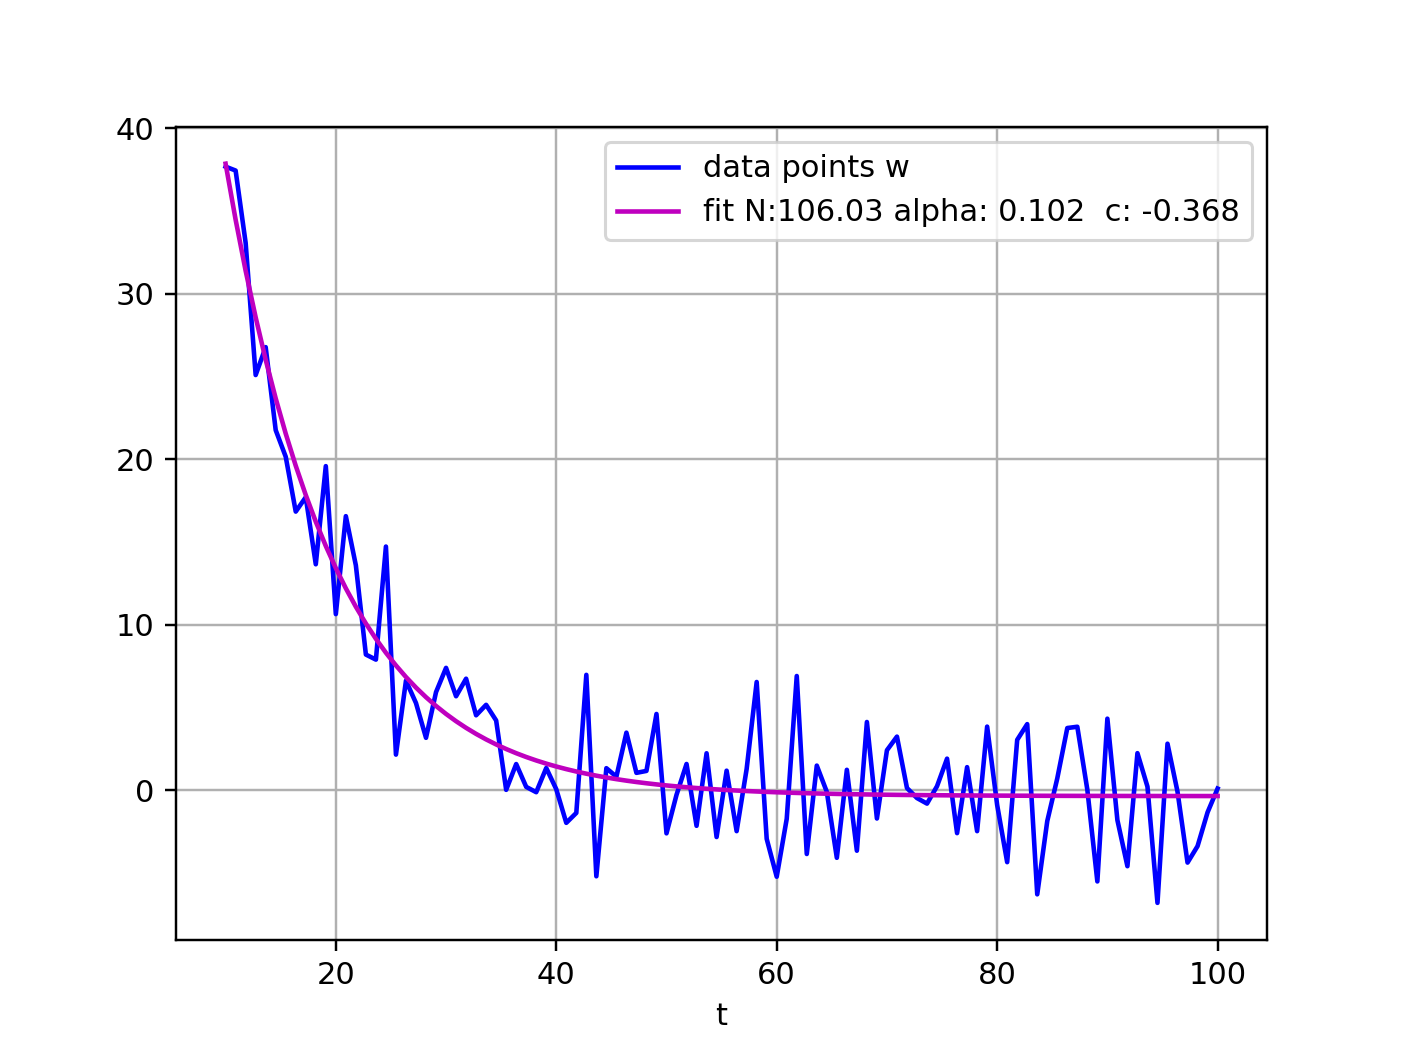

In [79]:
%matplotlib notebook
pl.plot(t, w, 'b-', label='data points w')

pl.plot(t, fitfunc(t, *fit_pars), 'm-', label='fit N:%.2f alpha: %.3f  c: %.3f'%tuple(fit_pars))

pl.legend()
pl.xlabel('t')
pl.grid()

## Storing Lists, Dicts, and Tuples

As you have seen with the example above, there is no automatic writing of objects. So for a dictionary you need to take care of formatting the output file. 

In [80]:
import random

datum = {'val':-1.1, 'err':0.2}

fname = 'data4.txt'

with open(fname,'w') as f:
    f.writelines("%s\t"%v for v in datum.keys())
    f.write('\n')
    for i in range(10):
        datum['val'] = random.uniform(-3.,3.)
        datum['err'] = random.normalvariate(0., 0.2)
        f.writelines("%.3f\t"%val for val in datum.values() )
        f.write('\n')


### Exercise
- use a dictionary to store data for 3 keys of different type
- store 100 dictionary instances in file
- read back and populate dictionary objects from file

## Storing NumPy objects

NumPy provides built-in functions to easily store and read ndarrays in binary and text format  without iterating over each element

In [81]:
import numpy as np
import os

matrix = np.random.randn(100,10)

fname = 'npdata1'
np.save(fname+'.npy', matrix)
np.savetxt(fname+'.txt', matrix)


Reading the file is also simple with `load()`

In [82]:
vals = np.load(fname+'.npy')

print(vals.shape)
print(vals[:1,])

(100, 10)
[[-2.95747562 -1.50024692  1.21855211  0.5943862   0.98796999 -1.17624915
  -0.33528755  0.63519956  1.38510365  1.19150436]]


The [Python Data Analysis Library (pandas)](http://pandas.pydata.org) provides even more efficient tools and data formats to handle data for analysis and their storage to file.

## Data storage with pickle and JSON 

With NumPy we saw the first example of using the binary format to easy store an array.

Previously we had oly saved data in text files by iterating over elements of lists and dictionaries.

Python provides a built-in [pickle]() library for easy storage of lists and other built-in python objects in binary format. 

In [83]:
import random
import pickle
import os

datum = {'val':-1.1, 'err':0.2}

fname = 'pickle1.data'
with open(fname,'wb') as f:
    pickle.dump(datum,f)

os.listdir()

['python-03.ipynb',
 'composite.md',
 'python-01.ipynb',
 '2020-11-24-board.pdf',
 'npdata1.npy',
 'makefile.md',
 'python.md',
 'python-05.ipynb',
 'cpp.pdf',
 '.DS_Store',
 'hw-01.pdf',
 'ml.md',
 '2020-10-30-board.pdf',
 'dxfit.jpg',
 '2020-11-03-board.pdf',
 'x.jpg',
 'pynb-save.png',
 'pickle1.data',
 '2020-10-02-board.pdf',
 'python-02.ipynb',
 '2020-10-16-board.pdf',
 '2020-11-10-board.pdf',
 'strategy_pattern.gif',
 '2020-10-23-board.pdf',
 'dx.jpg',
 'ROOT.md',
 'fitdata2.txt',
 '2020-10-09-board.pdf',
 'python-04.ipynb',
 '2020-09-29-board.pdf',
 'img',
 '2020-10-20-board.pdf',
 '2020-11-13-board.pdf',
 'classification-example.ipynb',
 '2020-10-13-board.pdf',
 'fitdata.txt',
 '2020-11-20-board.pdf',
 'special-attributes.png',
 '.ipynb_checkpoints',
 'strategy.md',
 'data1.txt',
 '2020-11-27-board.pdf',
 'data2.txt',
 'npdata1.txt',
 'introduction.pdf',
 'data.txt',
 'Composite_UML_class_diagram.png',
 '2020-10-06-board.pdf',
 'pynb-raw.png',
 'boost.md',
 'data4.txt',
 '2020-

Readig back is also easy

In [84]:

fname = 'pickle1.data'
with open(fname,'rb') as f:
    indata = pickle.load(f)

print(indata)


{'val': -1.1, 'err': 0.2}


## JSON 

However, a commonly used format for data storage that is cross platform and cross language is [JSON (JavaScript Object Notation](https://www.json.org).

The JSON librray in python allows you to convert python objects (including your custom classes) into JSON for storage.

Converting or enconding an object into JSON is commonly called **serialization**. Converting from JSON to python objects is referred to as **deserialization**. For  more details and introduction see this nice webpage on [working with JSON](https://realpython.com/python-json/). 

Here is an example of dictionary and list stored in JSON files.

There are two functions commonly used
- `dump()`: convert an object into JSON and possibly write to file
- `dumps()` note the extra **s**: converto to JSON string but cannot interact with file
The two functions are identical except for the file interaction.

In [85]:
import json
import os

datum = {'val':-1.1, 'err':0.2}

x = json.dumps(datum)
print(x)

data = [z for z in range(10)]
y = json.dumps(data)

print(y)

with open('data.json','w') as of:
    json.dump([datum, data], of)
 
os.listdir()

{"val": -1.1, "err": 0.2}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


['python-03.ipynb',
 'composite.md',
 'python-01.ipynb',
 '2020-11-24-board.pdf',
 'npdata1.npy',
 'makefile.md',
 'python.md',
 'python-05.ipynb',
 'cpp.pdf',
 '.DS_Store',
 'hw-01.pdf',
 'ml.md',
 '2020-10-30-board.pdf',
 'dxfit.jpg',
 '2020-11-03-board.pdf',
 'x.jpg',
 'pynb-save.png',
 'pickle1.data',
 '2020-10-02-board.pdf',
 'python-02.ipynb',
 '2020-10-16-board.pdf',
 '2020-11-10-board.pdf',
 'strategy_pattern.gif',
 '2020-10-23-board.pdf',
 'dx.jpg',
 'ROOT.md',
 'fitdata2.txt',
 '2020-10-09-board.pdf',
 'python-04.ipynb',
 '2020-09-29-board.pdf',
 'data.json',
 'img',
 '2020-10-20-board.pdf',
 '2020-11-13-board.pdf',
 'classification-example.ipynb',
 '2020-10-13-board.pdf',
 'fitdata.txt',
 '2020-11-20-board.pdf',
 'special-attributes.png',
 '.ipynb_checkpoints',
 'strategy.md',
 'data1.txt',
 '2020-11-27-board.pdf',
 'data2.txt',
 'npdata1.txt',
 'introduction.pdf',
 'data.txt',
 'Composite_UML_class_diagram.png',
 '2020-10-06-board.pdf',
 'pynb-raw.png',
 'boost.md',
 'data4

Now we read back or deserialize the data from file

In [86]:
with open('data.json') as infile:
    indata = json.load(infile)
print(indata)
datum = indata[0]
data = indata[1]
print(datum, data)

[{'val': -1.1, 'err': 0.2}, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
{'val': -1.1, 'err': 0.2} [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Functions with arbitrary number of arguments

As you have seen, `print()` function can have a variable number of arguments. The same behaviour can easily be defined for any custom defined function for both positioal and keyword arguments

## positional arguments

Additional arguments are taken via the special `*arg` argument which is a tuple of additional positional arguments

In [87]:
def myfunc(a, *arg):
    print("positional arguments: %s %s"%(a,arg))
    if len(arg):
        for x in arg:
            print('[%s]\t'%x)
        print('\n')


In [88]:
myfunc(1.1)


positional arguments: 1.1 ()


In [89]:
myfunc('ciao')


positional arguments: ciao ()


In [90]:
myfunc(-0.2, 0.3, 'ciao')

positional arguments: -0.2 (0.3, 'ciao')
[0.3]	
[ciao]	




In [91]:
myfunc(-0.2, 0.3, 'ciao', 'hello', -2, 100)

positional arguments: -0.2 (0.3, 'ciao', 'hello', -2, 100)
[0.3]	
[ciao]	
[hello]	
[-2]	
[100]	




## keyword arguments

For optional keyword arguments the `**kargs` feature is used

In [92]:
def myf2(a,mu=0.0, sig=0.1, **karg):
    print("a: %s"%(a))
    print("keyword arguments: %s %s %s"%(mu,sig,karg))
    if len(karg):
        for x in karg:
            print('[%s]\t'%x)
            
        print('\n')


In [93]:
myf2(0.1)


a: 0.1
keyword arguments: 0.0 0.1 {}


In [ ]:
myf2(0.3, sig=0.5)


In [94]:
myf2(0.3, color='red')


a: 0.3
keyword arguments: 0.0 0.1 {'color': 'red'}
[color]	




In [96]:
myf2(3, color='red', mu=0.6)

a: 3
keyword arguments: 0.6 0.1 {'color': 'red'}
[color]	




The additional keyword arguments are stored as a dictionary.

In [97]:
def myf3(a,mu=0.0, sig=0.1, **karg):
    print("a: %s"%(a))
    print("keyword arguments: %s %s %s"%(mu,sig,karg))
    if len(karg):
        for x in karg.keys():
            print('[%s = %s]\t'%(x, karg[x]))
        print('\n')
myf3(0.1)

a: 0.1
keyword arguments: 0.0 0.1 {}


In [98]:
myf3(0.3, color='red', mu=0.6)

a: 0.3
keyword arguments: 0.6 0.1 {'color': 'red'}
[color = red]	




You can also combine both positional and keyword arguments for the most generic function

In [100]:
def myf4(a,*arg, mu=0, sig=1, **karg):
    print("myf4 called")
    print("positional:  a: %s    optional: %s"%(a,arg))
    if len(arg):
        for x in arg:
            print('[%s]\t'%x)
        print('\n')
    print("keyword: %s %s %s"%(mu,sig,karg))    
    if len(karg):
        for x in karg.keys():
            print('[%s = %s]\t'%(x, karg[x]))
        print('\n')
    print('\n')
    

myf4(-0.1)

myf4 called
positional:  a: -0.1    optional: ()
keyword: 0 1 {}




In [101]:
myf4(-0.1,10.1)


myf4 called
positional:  a: -0.1    optional: (10.1,)
[10.1]	


keyword: 0 1 {}




In [102]:
myf4(-0.1,mu=10.1)

myf4 called
positional:  a: -0.1    optional: ()
keyword: 10.1 1 {}




In [103]:
myf4(0.3,'x','y', 0.9, color='red', mu=0.6, thick=1.1, fill='true')

myf4 called
positional:  a: 0.3    optional: ('x', 'y', 0.9)
[x]	
[y]	
[0.9]	


keyword: 0.6 1 {'color': 'red', 'thick': 1.1, 'fill': 'true'}
[color = red]	
[thick = 1.1]	
[fill = true]	






## Command line arguments for python programs

The sys module gives easy access to command line arguments as a list. An example is in [app1.py](../examples/python/app1.py)

In [ ]:
# %load examples/app1.py
import sys, os

print("Running "+__file__)

print("Running "+os.path.basename(__file__))


print("program called with %d arguments"%len(sys.argv))

for a in sys.argv:
    print(a)
